This notebook is to investigate the issue of no buildings being built in some large areas starting in 2023 or so.

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
store0 = pd.HDFStore('./../runs/run29.h5')
store1 = pd.HDFStore('./../runs/run37.h5')
parcels_lid = store0['base/parcels'][['large_area_id']]

In [3]:
total0 = pd.read_csv('run29_total.csv', index_col=0)
total1 = pd.read_csv('run37_total.csv', index_col=0)

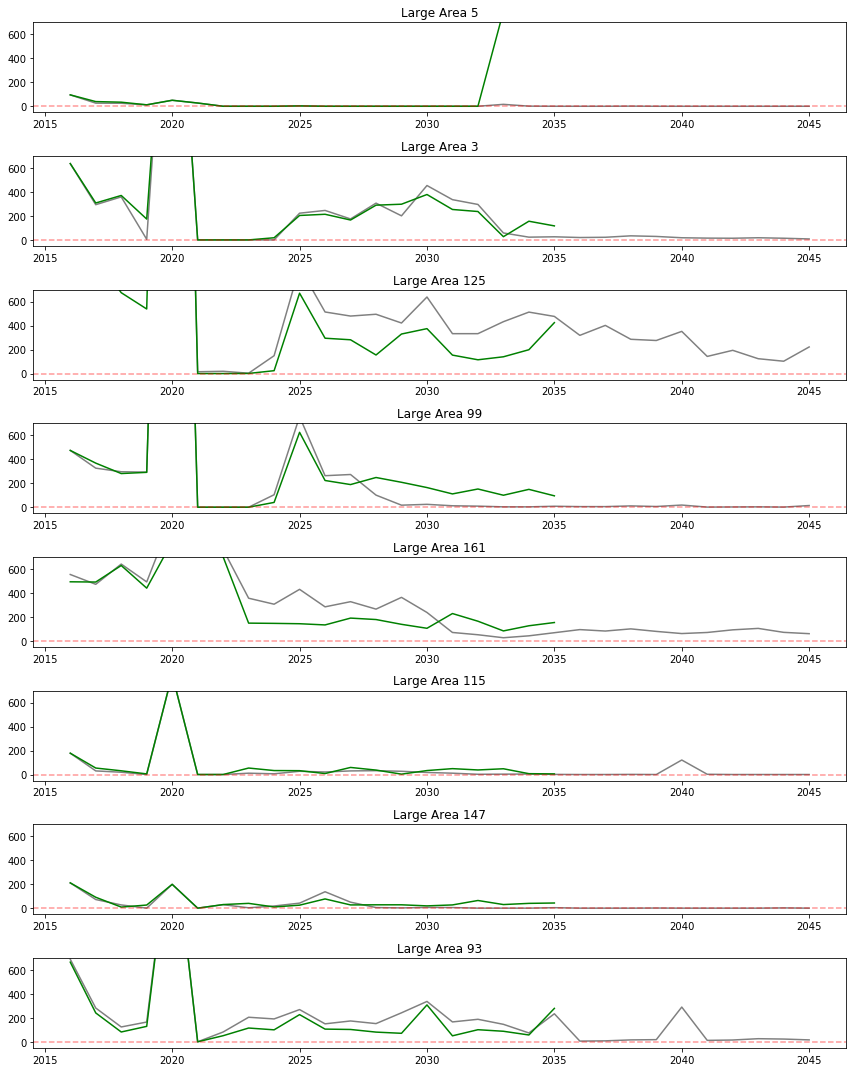

In [4]:
figure, axes_list = plt.subplots(len(total0), 1, figsize=(12, 15))
for i, ax in enumerate(axes_list):

    row = total0.fillna(0).iloc[i]
    ax.plot(row.index, row.values, color='gray')
    
    row1 = total1.fillna(0).iloc[i]
    ax.plot(row1.index, row1.values, color='green')
    
    ax.set_title('Large Area {}'.format(row.name))
    ax.axhline(y=0, color='red', alpha=0.4, linestyle='dashed')
    ax.set_ylim(bottom=-50, top=700)
    
figure.tight_layout()

In [8]:
# CHECK LENGTH OF FEASIBILITY TABLE
# This would tell us whether zoning is preventing development

stores = {29: store0, 37: store1}

# Residential
for run in (29, 37):
    feas = pd.DataFrame(index=parcels_lid.large_area_id.unique())
    for year in range(2016, 2036):
        feasibility_name = '{}/feasibility'.format(year)
        feasibility = stores[run][feasibility_name]['residential']
        feasibility = feasibility[feasibility.max_profit_far > 0]
        f = feasibility.merge(parcels_lid, left_index=True, right_index=True)
        bylid = f.groupby('large_area_id').size()
        feas[year] = bylid
    feas.to_csv('run{}_res_feasibility.csv'.format(run))

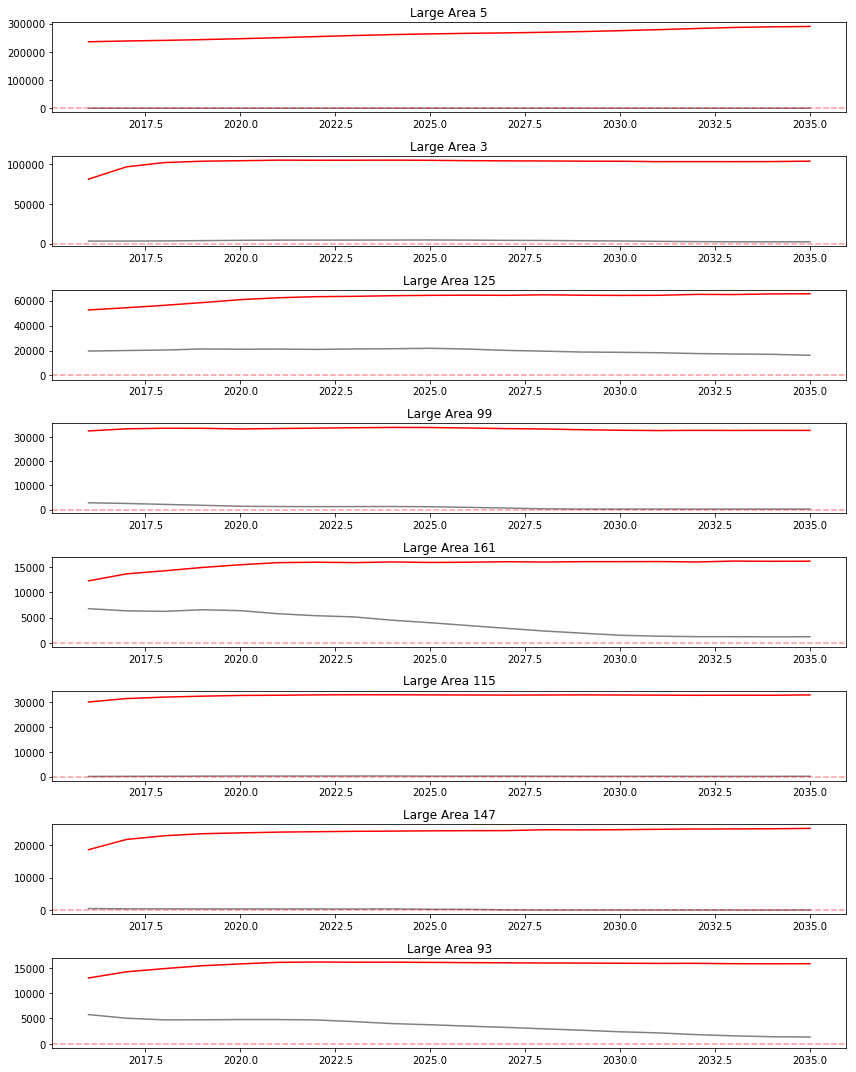

In [9]:
feas0 = pd.read_csv('run29_res_feasibility.csv', index_col=0)
feas1 = pd.read_csv('run37_res_feasibility.csv', index_col=0)

figure, axes_list = plt.subplots(len(feas0), 1, figsize=(12, 15))
for i, ax in enumerate(axes_list):

    row = feas0.fillna(0).iloc[i]
    ax.plot(row.index, row.values, color='gray')
    
    row1 = feas1.fillna(0).iloc[i]
    ax.plot(row1.index, row1.values, color='red')
    
    ax.set_title('Large Area {}'.format(row.name))
    ax.axhline(y=0, color='red', alpha=0.4, linestyle='dashed')
#     ax.set_ylim(bottom=-50, top=500)
    
figure.tight_layout()

In [19]:
year = 2017

lids = parcels_lid.large_area_id.unique()

for lid in lids:
    print lid
    year_feas = store1['{}/feasibility_{}'.format(year, lid)]
    res = year_feas['residential']
    df = res.loc[res.max_profit_far > 0]
    print len(df)

5
238438
3
96773
125
53923
99
33114
161
13410
115
31480
147
21698
93
14193


In [22]:
year = 2017

lids = parcels_lid.large_area_id.unique()
feas = store1['{}/feasibility'.format(year)]
res = feas['residential'].merge(parcels_lid, left_index=True, right_index=True)

for lid in lids:
    print lid
    df = res.loc[(res.large_area_id == lid) & (res.max_profit_far > 0)]
    print len(df)

5
238449
3
96860
125
54349
99
33340
161
13654
115
31510
147
21731
93
14235


In [24]:
store1['2017/feasibility_99']['residential']

,non_residential_sqft,parking_config,financing_cost,building_sqft,stories,total_cost,max_profit,building_cost,max_profit_far,construction_time,building_revenue,parking_ratio,residential_sqft
parcel_id,,,,,,,,,,,,,
3000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
